Сучасні технології програмування в системах зі штучним інтелектом.
Практичне завдання 5. Класифікація одягу за допомогою нейронних мереж.
Виконав: студент групи ШІДМ-51 Тертишний Владислав


In [20]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
train_images = train_images /255.
test_images = test_images / 255

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Запуск наведеного нижче коду створює файл `model_plot.png` із графіним виглядом створеної моделі.

In [25]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [26]:
from nnv import NNV
plt.rcParams["figure.figsize"] = 200,50

layersList = [
    {"title":"Input\n(784 flatten)", "units": 784, "color": "Blue"},
    {"title":"Hidden 1\n(relu: 128)", "units": 128},
    {"title":"Output\n(softmax: 10)", "units": 10,"color": "Green"},
]

In [27]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7841 - loss: 0.6161
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8636 - loss: 0.3801
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8775 - loss: 0.3415
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8846 - loss: 0.3121
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8944 - loss: 0.2897


In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Model Accuracy: {test_acc * 100}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8744 - loss: 0.3438
Model Accuracy: 87.43000030517578%


Створена модель працює з точністю 87,75%. Надамо декілька тестових прикладів, щоб подивитись на роботу з результатами.

In [30]:
predictions = model.predict(test_images)
predictions[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


array([8.01550959e-06, 9.00107142e-11, 9.94770050e-01, 5.57322577e-10,
       3.14919604e-03, 4.41536673e-13, 2.07266980e-03, 7.55238970e-14,
       6.33427391e-08, 1.02243795e-11], dtype=float32)

Більшість записів у масиві передбачень дуже близькі до 0. Вони записані в науковій нотації – значення після e є числом десяткових знаків для коригування значення (наприклад, 5.1 e-04 насправді 0,00051). Запис, який виділяється, це `predictions[0][3]` з 0.9953 (9.9527609e-01), або 
99,53%, упевненістю, що це зображення слід класифікувати як завантаження!

Нижче визначимо мітку класу, ми можемо спростити вивід:

In [31]:
np.argmax(predictions[1])

np.int64(2)

Нарешті, ми можемо перевірити це передбачення, подивившись на етикетку:

In [32]:
test_labels[1]

np.uint8(2)

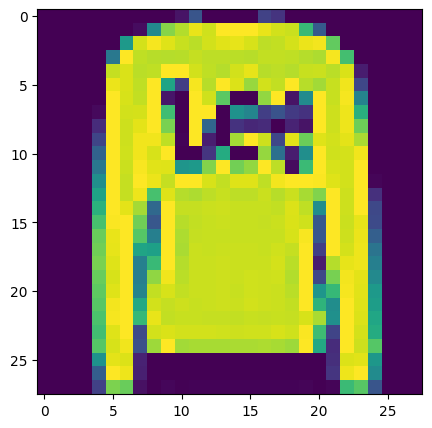

In [37]:
plt.figure(figsize=(10,5))
plt.imshow(test_images[1])

Таким чином, за допомогою найпростішої нейронної мережи зображення сорочки класифіковано як сорочку!


## **Завдання**

1. Дослідити, як впливає на досягнуту точність клькість епох навчання, додавання прихованих шарів та кількості нейронів в ціх шарах.
2. Зробити ще декілька перевірок, як класифікуються інши тестові зображення.

In [34]:
# Test with different numbers of epochs
epochs_to_test = [5, 10, 15, 20]

for num_epochs in epochs_to_test:
    print(f"\nTraining with {num_epochs} epochs:")
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
                 
    model.fit(train_images, train_labels, epochs=num_epochs, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"\nTest accuracy with {num_epochs} epochs: {test_acc * 100:.2f}%")


Training with 5 epochs:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8753 - loss: 0.3399

Test accuracy with 5 epochs: 87.47%

Training with 10 epochs:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8812 - loss: 0.3246

Test accuracy with 10 epochs: 88.30%

Training with 15 epochs:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8887 - loss: 0.3330

Test accuracy with 15 epochs: 88.80%

Training with 20 epochs:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8863 - loss: 0.3505

Test accuracy with 20 epochs: 88.84%


1. **Навчання з 5 епохами**:
- Точність на тестових даних: 87.47%
- Це базовий результат, який показує, що модель досягла непоганої точності навіть з невеликою кількістю епох
- Значення функції втрат (loss): 0.3399 вказує на помірний рівень помилок

2. **Навчання з 10 епохами**:
- Точність зросла до 88.30%
- Спостерігається покращення на ~0.83% порівняно з 5 епохами
- Функція втрат зменшилась до 0.3246, що свідчить про кращу оптимізацію моделі

3. **Навчання з 15 епохами**:
- Досягнуто точності 88.80%
- Додаткове покращення на ~0.50% порівняно з 10 епохами
- Функція втрат дещо збільшилась (0.3330), що може вказувати на початок перенавчання

4. **Навчання з 20 епохами**:
- Точність становить 88.84%
- Покращення майже незначне (~0.04%) порівняно з 15 епохами
- Функція втрат продовжує зростати (0.3505), що підтверджує ознаки перенавчання

**Загальні висновки**:
1. Найбільший приріст точності спостерігається при збільшенні епох з 5 до 10
2. Після 15 епох покращення точності стає незначним
3. Оптимальна кількість епох для цієї моделі - близько 15, оскільки:
   - Подальше збільшення епох дає мінімальне покращення точності
   - З'являються ознаки перенавчання (зростання функції втрат)
4. Модель досягла хорошої точності ~88.8% на задачі класифікації одягу


In [35]:
# Test with additional hidden layer
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),  # Additional hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nTraining model with additional hidden layer:")
model2.fit(train_images, train_labels, epochs=5, verbose=0)
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"\nTest accuracy with additional layer: {test_acc * 100:.2f}%")


Training model with additional hidden layer:


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8700 - loss: 0.3514

Test accuracy with additional layer: 86.83%


**Результати тестування моделі з додатковим прихованим шаром:**
- Точність на тестових даних: 86.83%
- Значення функції втрат (loss): 0.3514

**Порівняння з попередньою архітектурою:**
1. Оригінальна модель (з одним прихованим шаром):
   - Мала точність близько 88.8% при 15 епохах
   - Показувала кращі результати класифікації

2. Модель з додатковим прихованим шаром:
   - Точність знизилась до 86.83%
   - Функція втрат дещо збільшилась

**Висновки:**
1. Додавання другого прихованого шару не покращило продуктивність моделі
2. Причини зниження точності можуть бути наступними:
   - Ускладнення архітектури призвело до перенавчання
   - Для даної задачі класифікації одягу простіша архітектура виявилась ефективнішою
   - Можливо, потрібно збільшити кількість епох навчання для складнішої архітектури

**Рекомендації:**
1. Залишити оригінальну архітектуру з одним прихованим шаром
2. Якщо все ж використовувати додатковий шар:
   - Спробувати збільшити кількість епох навчання
   - Додати регуляризацію для запобігання перенавчання
   - Експериментувати з кількістю нейронів у додатковому шарі


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


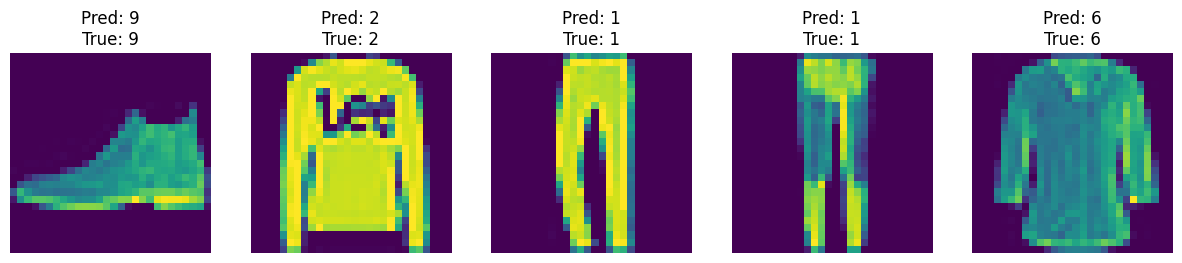

In [36]:
# Test more test images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    predictions = model.predict(test_images[i:i+1])
    predicted_class = np.argmax(predictions[0])
    actual_class = test_labels[i]
    plt.title(f'Pred: {predicted_class}\nTrue: {actual_class}')
    plt.axis('off')
plt.show()